Making Working Data Set

In [143]:
#Importing Package
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


Importing Data

In [ ]:
file_path = r"C:\Users\data-details.csv"
data_details = pd.read_csv(file_path)


In [ ]:
file_path2 = r"C:\Users\education_data.csv"
edu_data = pd.read_csv(file_path2)

In [ ]:
file_path3 = r"C:\Users\\data.csv"
data = pd.read_csv(file_path3)

SQL Query

In [149]:
# Connect to your SQLite database
conn = sqlite3.connect('your_database.db')

# Query to view data from the 'data_details' table
data_details_query = "SELECT * FROM data_details"
data_details_df = pd.read_sql_query(data_details_query, conn)
print("\nData Details Table:")
print(data_details_df)


# Now that all queries are done, close the connection
conn.close()



Data Details Table:
   id  column1  column2
0   1  Example      123
1   2  Example      123


In [158]:
# Connect to your SQLite database
conn = sqlite3.connect('your_database.db')
cursor = conn.cursor()

# Execute your SQL query (as a string) using the cursor
cursor.execute("SELECT * FROM data_details LIMIT 5;")
results = cursor.fetchall()
print(results)

# Close the connection when done
conn.close()


[(1, 'Example', 123), (2, 'Example', 123)]


Assessing Data

In [129]:
data.shape

(14534, 14)

In [15]:
edu_data.shape

(14534, 3)

In [16]:
data.head(10)

,unique_id,birth_year,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,b788ecae-24d3-4d2f-be70-291c656cfe35,2006,?,137363,Never-married,?,Own-child,White,Female,0,0,30,United-States,139650
1,c50f5eec-eee7-4f71-92ad-5fd2baace470,1989,Private,188041,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,80122
2,42dbe1ab-593f-4d41-b72f-32bb2081c64c,1999,Private,178478,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,115722
3,008c8da5-1688-4b85-a0d0-0516405c84d0,1981,Private,177905,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,3908,0,40,United-States,97534
4,32084da0-d75e-4f29-8c86-b7d120cdb759,1988,?,389850,Married-spouse-absent,?,Unmarried,Black,Male,0,0,50,United-States,113779
5,9b7b92e6-34a5-4fa0-910c-31d9c5d013bf,1973,Self-emp-inc,258735,Divorced,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,78441
6,916c9e7e-51a0-48e2-b196-df78306a48a7,1968,Private,76281,Married-spouse-absent,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,105791
7,cc0f9078-35ce-4712-9950-b4ffd37660aa,1974,Local-gov,74660,Widowed,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,134114
8,fb59e2b8-1b16-482d-9e9f-c2f8a80a2dfb,1982,Private,165916,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,83703
9,4318e3fc-b2bb-4d14-a12d-4d0dcbb674fe,1996,Private,22422,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,62839


In [17]:
data.describe()

,birth_year,fnlwgt,capital-gain,capital-loss,hours-per-week,income
count,14534.000000,1.453400e+04,14534.000000,14534.000000,14534.000000,14534.000000
mean,1985.319733,1.893544e+05,1038.709922,87.633411,40.355718,100233.693340
std,13.651412,1.050488e+05,7159.593738,405.333120,12.312948,29017.365858
min,1934.000000,1.228500e+04,0.000000,0.000000,1.000000,50003.000000
25%,1976.000000,1.176395e+05,0.000000,0.000000,40.000000,75379.000000
50%,1987.000000,1.782085e+05,0.000000,0.000000,40.000000,100251.000000
75%,1996.000000,2.378718e+05,0.000000,0.000000,45.000000,125349.750000
max,2007.000000,1.455435e+06,99999.000000,4356.000000,99.000000,149997.000000


In [18]:
data_details.head(20)

,Variable Name,Role,Type,Demographic,Description,Units
0,unique_id,Feature,Categorical,NaN,Unique identifier for each person,NaN
1,birth_year,Feature,Integer,NaN,Year of birth,NaN
2,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",NaN
3,fnlwgt,Feature,Integer,NaN,NaN,NaN
4,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-s...",NaN
5,education-num,Feature,Integer,Education Level,NaN,NaN
6,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",NaN
7,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",NaN
8,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",NaN
9,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",NaN


In [19]:
edu_data.head()

,unique_id,education,education-num
0,b788ecae-24d3-4d2f-be70-291c656cfe35,Some-college,10
1,c50f5eec-eee7-4f71-92ad-5fd2baace470,Some-college,10
2,42dbe1ab-593f-4d41-b72f-32bb2081c64c,Bachelors,13
3,008c8da5-1688-4b85-a0d0-0516405c84d0,HS-grad,9
4,32084da0-d75e-4f29-8c86-b7d120cdb759,HS-grad,9


Merging Data Sets

In [20]:
data_merge=pd.merge(data, edu_data, on = 'unique_id',how='left')

In [21]:
data_merge.sort_values("income", axis=0, ascending=False,inplace=True, na_position='last')

In [22]:
data_merge.describe()

,birth_year,fnlwgt,capital-gain,capital-loss,hours-per-week,income,education-num
count,14534.000000,1.453400e+04,14534.000000,14534.000000,14534.000000,14534.000000,14147.000000
mean,1985.319733,1.893544e+05,1038.709922,87.633411,40.355718,100233.693340,10.102071
std,13.651412,1.050488e+05,7159.593738,405.333120,12.312948,29017.365858,2.571178
min,1934.000000,1.228500e+04,0.000000,0.000000,1.000000,50003.000000,1.000000
25%,1976.000000,1.176395e+05,0.000000,0.000000,40.000000,75379.000000,9.000000
50%,1987.000000,1.782085e+05,0.000000,0.000000,40.000000,100251.000000,10.000000
75%,1996.000000,2.378718e+05,0.000000,0.000000,45.000000,125349.750000,12.000000
max,2007.000000,1.455435e+06,99999.000000,4356.000000,99.000000,149997.000000,16.000000


In [23]:
data_merge.head(20)

,unique_id,birth_year,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education,education-num
5567,704dbbb0-4fbb-4f98-917c-bdc18c2e62ac,1991,Private,278736,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,149997,Assoc-voc,11.0
492,78ebd3dd-e9ae-4e3d-80c7-43e1e2dec93c,1971,NaN,53812,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,54,United-States,149995,Some-college,10.0
13683,e4bedde7-a824-4ea3-943e-4705bb8336f8,1991,Private,121966,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,149988,HS-grad,9.0
14042,8ddc88a7-6ec6-4052-a3ef-f1f34235ca46,2000,Private,141040,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,149988,Some-college,10.0
1991,57c5c2b4-72b3-4612-9304-f4bc26c138f5,1996,Private,47907,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,149978,Bachelors,13.0
2133,7e6a48c9-2fa2-41fd-9972-dddd8127ae63,1977,Self-emp-not-inc,370119,Married-civ-spouse,Sales,Husband,White,Male,15024,0,50,United-States,149975,Bachelors,13.0
1634,c9f5aede-3ad0-4806-8a3c-c62da4dcb87c,1973,Private,168660,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,149975,11th,7.0
10571,a043b93a-d6ab-42cd-b258-457850b640f0,1977,Self-emp-not-inc,33300,Never-married,Farming-fishing,Other-relative,White,Male,10520,0,45,United-States,149971,Assoc-acdm,12.0
13378,321e20c4-56b5-4c5e-875d-877883734229,2001,Self-emp-not-inc,258298,Never-married,Adm-clerical,Own-child,White,Male,0,2231,40,United-States,149969,Bachelors,13.0
8228,097c2ff9-6954-4f32-b251-fe322eebd68b,1988,Private,33394,Married-civ-spouse,Sales,Husband,White,Male,0,1887,35,United-States,149960,Bachelors,13.0


Adding a copy and columns and obvious imputation

In [24]:
dm_copy = data_merge.copy()

In [25]:
#Cutting for income
i_bin_edges = [50000, 65000, 80000, 95000, 110000, 125000, 140000, float('inf')]
i_bin_labels = ['50,000-64,999', '65,000-79,999', '80000-94,999', '95000-109,999', '110000-124,999', '125000-139,999', '140,000+']

# Use pd.cut() to categorize income
dm_copy['income_pd_cut'] = pd.cut(dm_copy['income'], bins=i_bin_edges, labels=i_bin_labels, right=False)

In [26]:
#Cutting for hours
h_bin_edges = [0, 15, 30, 45, 60, 75, 90, float('inf')]
h_bin_labels = ['0-14', '15-29', '30-44', '45-59', '60-74', '75-89', '90+']

# Use pd.cut() to categorize hours
dm_copy['hours_pd_cut'] = pd.cut(dm_copy['hours-per-week'], bins=h_bin_edges, labels=h_bin_labels, right=False)

In [27]:
dm_copy.columns.values

array(['unique_id', 'birth_year', 'workclass', 'fnlwgt', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'education', 'education-num', 'income_pd_cut', 'hours_pd_cut'],
      dtype=object)

In [28]:
dm_copy.isnull().sum()

unique_id            0
birth_year           0
workclass          721
fnlwgt               0
marital-status       0
occupation           0
relationship         0
race                 0
sex               1802
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
education          387
education-num      387
income_pd_cut        0
hours_pd_cut         0
dtype: int64

In [29]:
#Stripping Whitespace from all variables
dm_stripped = dm_copy.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\jacob\AppData\Local\Temp\ipykernel_19452\382624337.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dm_stripped = dm_copy.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [30]:
# Handling missing values
# fill in missing 'Sex' values based on 'Relationship'
def fill_sex(row):
    if pd.isna(row['sex']):
        if row['relationship'] == 'Husband':
            return 'Male'
        elif row['relationship'] == 'Wife':
            return 'Female'
    return row['sex']

# Apply the function to fill missing 'Sex' values
dm_stripped['sex'] = dm_stripped.apply(fill_sex, axis=1)

# Check the result
print(dm_stripped[['relationship', 'sex']].head())

        relationship     sex
5567         Husband    Male
492    Not-in-family  Female
13683  Not-in-family  Female
14042      Own-child  Female
1991   Not-in-family  Female


In [31]:
#Checking if data was imputed
dm_stripped.isnull().sum()

unique_id           0
birth_year          0
workclass         721
fnlwgt              0
marital-status      0
occupation          0
relationship        0
race                0
sex               925
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
education         387
education-num     387
income_pd_cut       0
hours_pd_cut        0
dtype: int64

EDA of Merged Dataset

In [32]:
# Adding column age
dm_stripped['age'] = 2024 - data_merge['birth_year']

In [33]:
dm_stripped.columns.values

array(['unique_id', 'birth_year', 'workclass', 'fnlwgt', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'education', 'education-num', 'income_pd_cut', 'hours_pd_cut',
       'age'], dtype=object)

In [34]:
age_salary_corr = dm_stripped[['age', 'income']].corr()  # Check correlation between age and salary

In [35]:
numeric_data = dm_stripped.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

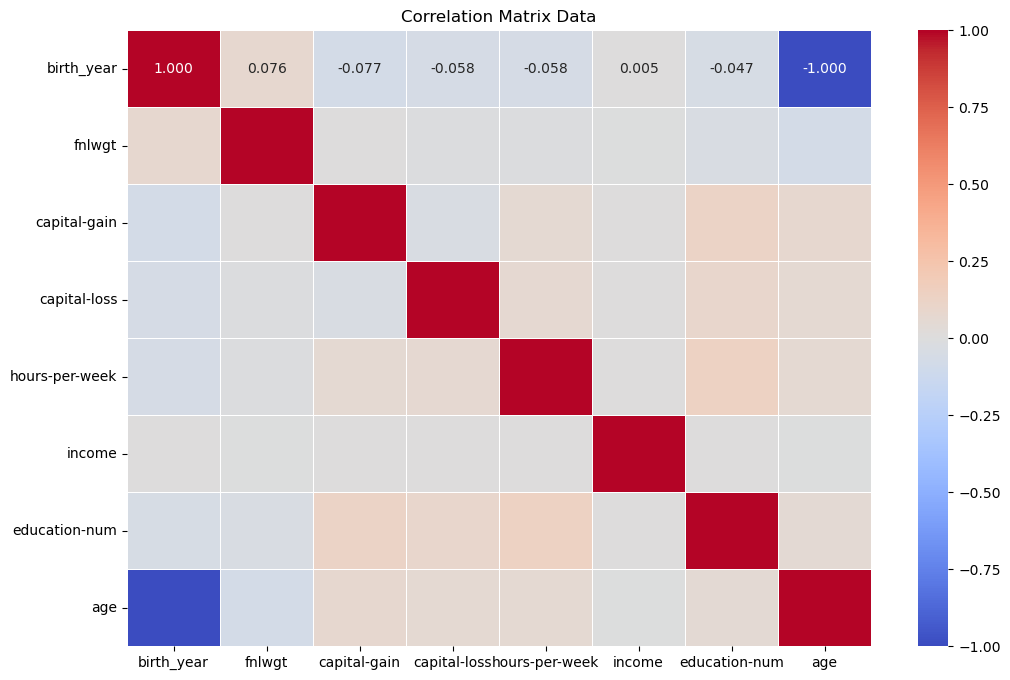

In [36]:
corr_matrix = dm_stripped.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Data')
plt.show()


In [37]:
print(corr_matrix)


                birth_year    fnlwgt  capital-gain  capital-loss  \
birth_year        1.000000  0.075910     -0.076632     -0.058429   
fnlwgt            0.075910  1.000000      0.000170     -0.013633   
capital-gain     -0.076632  0.000170      1.000000     -0.031368   
capital-loss     -0.058429 -0.013633     -0.031368      1.000000   
hours-per-week   -0.058472 -0.014111      0.062267      0.064656   
income            0.005340 -0.006419      0.001480      0.001244   
education-num    -0.047289 -0.033623      0.117999      0.090074   
age              -1.000000 -0.075910      0.076632      0.058429   

                hours-per-week    income  education-num       age  
birth_year           -0.058472  0.005340      -0.047289 -1.000000  
fnlwgt               -0.014111 -0.006419      -0.033623 -0.075910  
capital-gain          0.062267  0.001480       0.117999  0.076632  
capital-loss          0.064656  0.001244       0.090074  0.058429  
hours-per-week        1.000000  0.004701       

In [38]:
age_salary_corr

,age,income
age,1.00000,-0.00534
income,-0.00534,1.00000


In [39]:
dm_stripped.describe(include='all')

,unique_id,birth_year,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education,education-num,income_pd_cut,hours_pd_cut,age
count,14534,14534.000000,13813,1.453400e+04,14534,14534,14534,14534,13609,14534.000000,14534.000000,14534.000000,14534,14534.000000,14147,14147.000000,14534,14534,14534.000000
unique,14534,NaN,9,NaN,7,15,6,5,2,NaN,NaN,NaN,41,NaN,16,NaN,7,7,NaN
top,704dbbb0-4fbb-4f98-917c-bdc18c2e62ac,NaN,Private,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN,HS-grad,NaN,"80000-94,999",30-44,NaN
freq,1,NaN,9610,NaN,6740,1862,5923,12374,9275,NaN,NaN,NaN,13032,NaN,4536,NaN,2213,8762,NaN
mean,NaN,1985.319733,NaN,1.893544e+05,NaN,NaN,NaN,NaN,NaN,1038.709922,87.633411,40.355718,NaN,100233.693340,NaN,10.102071,NaN,NaN,38.680267
std,NaN,13.651412,NaN,1.050488e+05,NaN,NaN,NaN,NaN,NaN,7159.593738,405.333120,12.312948,NaN,29017.365858,NaN,2.571178,NaN,NaN,13.651412
min,NaN,1934.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,50003.000000,NaN,1.000000,NaN,NaN,17.000000
25%,NaN,1976.000000,NaN,1.176395e+05,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,75379.000000,NaN,9.000000,NaN,NaN,28.000000
50%,NaN,1987.000000,NaN,1.782085e+05,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,100251.000000,NaN,10.000000,NaN,NaN,37.000000
75%,NaN,1996.000000,NaN,2.378718e+05,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,125349.750000,NaN,12.000000,NaN,NaN,48.000000


In [40]:
#counting Data
dm_stripped['sex'].value_counts()

sex
Male      9275
Female    4334
Name: count, dtype: int64

In [41]:
dm_copy['race'].value_counts()

race
 White                 12374
 Black                  1445
 Asian-Pac-Islander      464
 Amer-Indian-Eskimo      131
 Other                   120
Name: count, dtype: int64

In [42]:
data_merge['marital-status'].value_counts()

marital-status
 Married-civ-spouse       6740
 Never-married            4702
 Divorced                 1982
 Widowed                   461
 Separated                 457
 Married-spouse-absent     183
 Married-AF-spouse           9
Name: count, dtype: int64

In [43]:
#finding Min and Max imcome
data_merge['income'].describe(include='all')

count     14534.000000
mean     100233.693340
std       29017.365858
min       50003.000000
25%       75379.000000
50%      100251.000000
75%      125349.750000
max      149997.000000
Name: income, dtype: float64

In [44]:
dm_stripped['occupation'].value_counts()

occupation
Prof-specialty       1862
Exec-managerial      1782
Craft-repair         1782
Adm-clerical         1677
Sales                1632
Other-service        1499
?                     868
Machine-op-inspct     866
Transport-moving      705
Handlers-cleaners     638
Farming-fishing       425
Tech-support          415
Protective-serv       299
Priv-house-serv        80
Armed-Forces            4
Name: count, dtype: int64

In [45]:
dm_stripped['education'].value_counts()

education
HS-grad         4536
Some-college    3198
Bachelors       2308
Masters          785
Assoc-voc        624
11th             500
Assoc-acdm       449
10th             412
7th-8th          262
Prof-school      240
9th              222
Doctorate        195
12th             178
5th-6th          139
1st-4th           74
Preschool         25
Name: count, dtype: int64

EDA for Income distribution

In [46]:
income_by_gender = dm_stripped.groupby('sex')['income'].mean()

In [47]:
income_by_gender

sex
Female    100453.508306
Male      100040.539407
Name: income, dtype: float64

In [48]:
income_by_race = data_merge.groupby('race')['income'].mean()

In [49]:
income_by_race

race
 Amer-Indian-Eskimo     98458.473282
 Asian-Pac-Islander    101164.247845
 Black                 100485.619377
 Other                 102665.600000
 White                 100164.589947
Name: income, dtype: float64

In [50]:
income_by_education = data_merge.groupby('education')['income'].mean()

In [51]:
income_by_education

education
 10th            100144.305825
 11th             99148.398000
 12th             98259.769663
 1st-4th         100740.405405
 5th-6th         102431.812950
 7th-8th         101504.156489
 9th             100926.090090
 Assoc-acdm       98889.710468
 Assoc-voc       100945.565705
 Bachelors        99871.342721
 Doctorate       105450.646154
 HS-grad          99938.173280
 Masters         100188.112102
 Preschool        97113.240000
 Prof-school     104325.408333
 Some-college    100448.366479
Name: income, dtype: float64

Cross sectioning Data for Insights

In [52]:
income_distribution = dm_copy.pivot_table(index='income_pd_cut',
                            values='income', aggfunc='count')

In [53]:
income_distribution

,income
income_pd_cut,
"50,000-64,999",2155
"65,000-79,999",2143
"80000-94,999",2213
"95000-109,999",2210
"110000-124,999",2131
"125000-139,999",2149
"140,000+",1533


In [54]:
pivot_income_education_mean = dm_copy.pivot_table(index='education',
                            values='income', aggfunc='mean')

In [55]:
pivot_income_education_mean

,income
education,
10th,100144.305825
11th,99148.398000
12th,98259.769663
1st-4th,100740.405405
5th-6th,102431.812950
7th-8th,101504.156489
9th,100926.090090
Assoc-acdm,98889.710468
Assoc-voc,100945.565705


In [56]:
pivot_income_education_num_mean = dm_copy.pivot_table(index='education-num',
                            values='income', aggfunc='mean')

In [57]:
pivot_income_education_num_mean

,income
education-num,
1.0,97113.240000
2.0,100740.405405
3.0,102431.812950
4.0,101504.156489
5.0,100926.090090
6.0,100144.305825
7.0,99148.398000
8.0,98259.769663
9.0,99938.173280


In [58]:
pivot_income_education_race_count = dm_copy.pivot_table(index='education',
                            values='income', aggfunc='mean')

In [59]:
pivot_income_hours_per_week_race_count = dm_copy.pivot_table(index='income_pd_cut', columns='race',
                            values='hours-per-week', aggfunc='count')

In [60]:
pivot_income_hours_per_week_race_count

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income_pd_cut,,,,,
"50,000-64,999",19,59,204,18,1855
"65,000-79,999",26,71,219,10,1817
"80000-94,999",17,76,224,18,1878
"95000-109,999",20,76,210,24,1880
"110000-124,999",20,61,219,19,1812
"125000-139,999",15,65,216,18,1835
"140,000+",14,56,153,13,1297


In [61]:
pivot_income_hours_per_week_race_avg = dm_copy.pivot_table(index='hours_pd_cut', columns='race',
                            values='hours-per-week', aggfunc='mean')

In [62]:
pivot_income_hours_per_week_race_avg

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
hours_pd_cut,,,,,
0-14,8.000000,7.800000,8.454545,5.500000,8.634921
15-29,19.166667,20.590909,21.408451,22.000000,20.851883
30-44,38.923913,39.174342,38.923290,38.034091,38.907032
45-59,48.909091,48.934426,48.204380,48.416667,49.090557
60-74,61.545455,61.814815,61.581395,63.500000,62.510588
75-89,84.000000,79.750000,78.000000,84.000000,79.844828
90+,NaN,99.000000,99.000000,98.000000,96.636364


In [63]:
pivot_income_occupations_race_count = dm_copy.pivot_table(index='occupation', columns='race',
                            values='income', aggfunc='count')

In [64]:
pivot_income_occupations_race_count

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
occupation,,,,,
?,14.0,37.0,96.0,11.0,710.0
Adm-clerical,15.0,70.0,219.0,9.0,1364.0
Armed-Forces,NaN,NaN,NaN,NaN,4.0
Craft-repair,23.0,33.0,112.0,14.0,1600.0
Exec-managerial,10.0,65.0,108.0,7.0,1592.0
Farming-fishing,2.0,9.0,23.0,4.0,387.0
Handlers-cleaners,10.0,9.0,95.0,4.0,520.0
Machine-op-inspct,3.0,25.0,132.0,16.0,690.0
Other-service,12.0,50.0,269.0,20.0,1148.0


In [65]:
pivot_income_occupations_race = dm_stripped.pivot_table(index='occupation', columns='race',
                            values='income', aggfunc='mean')
                        

In [66]:
pivot_income_occupations_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
occupation,,,,,
?,107915.000000,99531.216216,106576.468750,101709.000000,100021.847887
Adm-clerical,102849.400000,100901.085714,100348.872146,101660.888889,101695.906158
Armed-Forces,NaN,NaN,NaN,NaN,96712.250000
Craft-repair,91388.130435,102173.939394,95624.598214,102925.928571,100845.231250
Exec-managerial,86250.700000,98882.138462,101101.666667,106078.714286,99535.841080
Farming-fishing,81173.500000,95394.888889,92643.434783,115752.750000,97488.638243
Handlers-cleaners,99533.100000,121612.555556,102647.684211,107645.250000,101818.605769
Machine-op-inspct,106178.666667,106264.000000,101091.553030,101127.500000,98096.768116
Other-service,93344.500000,96355.940000,97535.884758,101083.150000,99926.755226


In [67]:
dm_copy.columns.values

array(['unique_id', 'birth_year', 'workclass', 'fnlwgt', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'education', 'education-num', 'income_pd_cut', 'hours_pd_cut'],
      dtype=object)

In [68]:
pivot_income_occupations_sex = dm_stripped.pivot_table(index='occupation', columns='sex',
                            values='income', aggfunc='mean')

In [69]:
pivot_income_occupations_sex

sex,Female,Male
occupation,,
?,100093.893557,101411.271523
Adm-clerical,101605.955511,100614.444653
Armed-Forces,NaN,111130.000000
Craft-repair,101353.400000,100316.706971
Exec-managerial,100348.160633,99191.899361
Farming-fishing,101015.343750,97491.975610
Handlers-cleaners,101696.246575,102098.972763
Machine-op-inspct,100585.759091,98450.634680
Other-service,98995.529015,99313.265176


In [70]:
pivot_hours_per_week_sex = dm_stripped.pivot_table(index='hours_pd_cut', columns='sex',
                            values='hours-per-week', aggfunc='count')

In [71]:
pivot_hours_per_week_sex

sex,Female,Male
hours_pd_cut,,
0-14,197,202
15-29,676,610
30-44,2862,5296
45-59,465,2217
60-74,115,785
75-89,13,113
90+,6,52


In [72]:
pivot_income_hours_per_week_sex = dm_stripped.pivot_table(index='hours_pd_cut', columns='sex',
                            values='income', aggfunc='mean')

In [73]:
pivot_income_hours_per_week_sex

sex,Female,Male
hours_pd_cut,,
0-14,102039.974619,99017.173267
15-29,98368.718935,99178.411475
30-44,101020.765549,100132.933346
45-59,100205.713978,99519.184032
60-74,98075.817391,101899.871338
75-89,98618.461538,100439.699115
90+,81421.500000,98011.000000


In [74]:
dm_copy.columns.values

array(['unique_id', 'birth_year', 'workclass', 'fnlwgt', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'education', 'education-num', 'income_pd_cut', 'hours_pd_cut'],
      dtype=object)

In [75]:
pivot_income_test = dm_copy.pivot_table(index='native-country',
                            values='income', aggfunc='mean')

In [76]:
pivot_income_test

,income
native-country,
?,101236.890566
Cambodia,100658.333333
Canada,91579.867925
China,100345.951220
Columbia,87013.210526
Cuba,101793.372093
Dominican-Republic,100796.466667
Ecuador,107773.461538
El-Salvador,102829.279070


In [77]:
pivot_income_test2 = dm_copy.pivot_table(index='native-country',
                            values='income', aggfunc='count')

In [78]:
pivot_income_test2

,income
native-country,
?,265
Cambodia,9
Canada,53
China,41
Columbia,19
Cuba,43
Dominican-Republic,30
Ecuador,13
El-Salvador,43


In [79]:
pivot_income_test3 = dm_copy.pivot_table(index='marital-status',
                            values='income', aggfunc='mean')

In [80]:
pivot_income_test3

,income
marital-status,
Divorced,100285.557013
Married-AF-spouse,89984.555556
Married-civ-spouse,100276.648961
Married-spouse-absent,101904.726776
Never-married,100360.331561
Separated,97810.947484
Widowed,100029.507592


In [81]:
pivot_income_test4 = dm_copy.pivot_table(index='marital-status',
                            values='hours-per-week', aggfunc='mean')

In [82]:
pivot_income_test4

,hours-per-week
marital-status,
Divorced,41.237639
Married-AF-spouse,41.777778
Married-civ-spouse,43.170326
Married-spouse-absent,39.409836
Never-married,36.841131
Separated,38.818381
Widowed,33.132321


In [83]:
pivot_income_test5 = dm_stripped.pivot_table(index='age',
                            values='income', aggfunc='mean')

In [84]:
pivot_income_test5

,income
age,
17,97489.604520
18,96201.910714
19,101255.108761
20,103108.911111
21,102297.398754
...,...
84,118944.500000
85,110397.500000
87,87888.000000


In [85]:
pivot_income_test6 = dm_stripped.pivot_table(index='occupation', columns ='sex',
                            values='income', aggfunc='mean')

In [86]:
pivot_income_test6

sex,Female,Male
occupation,,
?,100093.893557,101411.271523
Adm-clerical,101605.955511,100614.444653
Armed-Forces,NaN,111130.000000
Craft-repair,101353.400000,100316.706971
Exec-managerial,100348.160633,99191.899361
Farming-fishing,101015.343750,97491.975610
Handlers-cleaners,101696.246575,102098.972763
Machine-op-inspct,100585.759091,98450.634680
Other-service,98995.529015,99313.265176


In [87]:
pivot_income_test7 = dm_stripped.pivot_table(index='occupation', columns ='sex',
                            values='income', aggfunc='count')

In [88]:
pivot_income_test7

sex,Female,Male
occupation,,
?,357.0,453.0
Adm-clerical,989.0,533.0
Armed-Forces,NaN,3.0
Craft-repair,85.0,1621.0
Exec-managerial,442.0,1252.0
Farming-fishing,32.0,369.0
Handlers-cleaners,73.0,514.0
Machine-op-inspct,220.0,594.0
Other-service,741.0,626.0


Checking '?' values 

In [89]:
#checking for columns with '?' value
columns_with_question_mark = dm_stripped.columns[(dm_stripped == '?').any()]

In [90]:
columns_with_question_mark

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [91]:
#checking to see number of '?' 
dm_stripped["workclass"].value_counts() 

workclass
Private             9610
Self-emp-not-inc    1039
Local-gov            899
?                    813
State-gov            540
Self-emp-inc         480
Federal-gov          419
Never-worked           7
Without-pay            6
Name: count, dtype: int64

In [92]:
#checking to see number of '?' 
dm_stripped["occupation"].value_counts()

occupation
Prof-specialty       1862
Exec-managerial      1782
Craft-repair         1782
Adm-clerical         1677
Sales                1632
Other-service        1499
?                     868
Machine-op-inspct     866
Transport-moving      705
Handlers-cleaners     638
Farming-fishing       425
Tech-support          415
Protective-serv       299
Priv-house-serv        80
Armed-Forces            4
Name: count, dtype: int64

In [93]:
#checking to see number of '?' 
dm_stripped["native-country"].value_counts()

native-country
United-States                 13032
Mexico                          276
?                               265
Philippines                      81
Germany                          55
Canada                           53
Puerto-Rico                      48
El-Salvador                      43
Cuba                             43
China                            41
India                            40
South                            40
Jamaica                          39
England                          39
Italy                            39
Vietnam                          36
Dominican-Republic               30
Japan                            29
Poland                           29
Guatemala                        28
Taiwan                           24
Columbia                         19
Portugal                         19
Haiti                            18
Iran                             17
Ecuador                          13
Nicaragua                        13
France       

```
Running model that Drops NA values
```

In [94]:
dm_copy_drop = dm_stripped.copy()

In [95]:
dm_copy_drop.isnull().sum()

unique_id           0
birth_year          0
workclass         721
fnlwgt              0
marital-status      0
occupation          0
relationship        0
race                0
sex               925
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
education         387
education-num     387
income_pd_cut       0
hours_pd_cut        0
age                 0
dtype: int64

In [96]:
dm_copy_drop.shape

(14534, 19)

Model 1 Dropping Null values


In [97]:
# Preparing the data for modeling
X = dm_copy_drop.drop(columns=['income','unique_id','birth_year','education-num'])
y = dm_copy_drop['income']

In [98]:
X = pd.get_dummies(X, drop_first=True)

In [99]:
X.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,"income_pd_cut_95000-109,999","income_pd_cut_110000-124,999","income_pd_cut_125000-139,999","income_pd_cut_140,000+",hours_pd_cut_15-29,hours_pd_cut_30-44,hours_pd_cut_45-59,hours_pd_cut_60-74,hours_pd_cut_75-89,hours_pd_cut_90+
5567,278736,0,0,50,33,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
492,53812,0,0,54,53,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
13683,121966,0,0,40,33,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
14042,141040,0,0,40,24,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1991,47907,0,0,40,28,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


In [100]:
X.isnull().sum()

fnlwgt                0
capital-gain          0
capital-loss          0
hours-per-week        0
age                   0
                     ..
hours_pd_cut_30-44    0
hours_pd_cut_45-59    0
hours_pd_cut_60-74    0
hours_pd_cut_75-89    0
hours_pd_cut_90+      0
Length: 110, dtype: int64

In [101]:
X = X.dropna()

In [102]:
X.isnull().sum()

fnlwgt                0
capital-gain          0
capital-loss          0
hours-per-week        0
age                   0
                     ..
hours_pd_cut_30-44    0
hours_pd_cut_45-59    0
hours_pd_cut_60-74    0
hours_pd_cut_75-89    0
hours_pd_cut_90+      0
Length: 110, dtype: int64

In [103]:
# Label encoding categorical features: 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
le = LabelEncoder()
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education']
for col in categorical_cols:
    dm_copy_drop[col] = le.fit_transform(dm_copy_drop[col])

# Defining features (X) and target (y)
X = dm_copy_drop[['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week','native-country','education']]
y = dm_copy_drop['income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage error Error: {mae}')

Mean Absolute Percentage error Error: 0.29414222277640206


In [104]:
dm_stripped.isnull().sum()

unique_id           0
birth_year          0
workclass         721
fnlwgt              0
marital-status      0
occupation          0
relationship        0
race                0
sex               925
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
education         387
education-num     387
income_pd_cut       0
hours_pd_cut        0
age                 0
dtype: int64

In [105]:
dm_copy_drop.head()

,unique_id,birth_year,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education,education-num,income_pd_cut,hours_pd_cut,age
5567,704dbbb0-4fbb-4f98-917c-bdc18c2e62ac,1991,4,278736,2,7,0,4,1,0,0,50,38,149997,8,11.0,"140,000+",45-59,33
492,78ebd3dd-e9ae-4e3d-80c7-43e1e2dec93c,1971,9,53812,6,4,1,4,0,0,0,54,38,149995,15,10.0,"140,000+",45-59,53
13683,e4bedde7-a824-4ea3-943e-4705bb8336f8,1991,4,121966,0,1,1,4,0,0,0,40,38,149988,11,9.0,"140,000+",30-44,33
14042,8ddc88a7-6ec6-4052-a3ef-f1f34235ca46,2000,4,141040,4,1,3,2,0,0,0,40,38,149988,15,10.0,"140,000+",30-44,24
1991,57c5c2b4-72b3-4612-9304-f4bc26c138f5,1996,4,47907,4,1,1,4,0,0,0,40,38,149978,9,13.0,"140,000+",30-44,28


In [106]:
dm_copy_drop.isnull().sum()

unique_id           0
birth_year          0
workclass           0
fnlwgt              0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
education           0
education-num     387
income_pd_cut       0
hours_pd_cut        0
age                 0
dtype: int64

<Axes: >

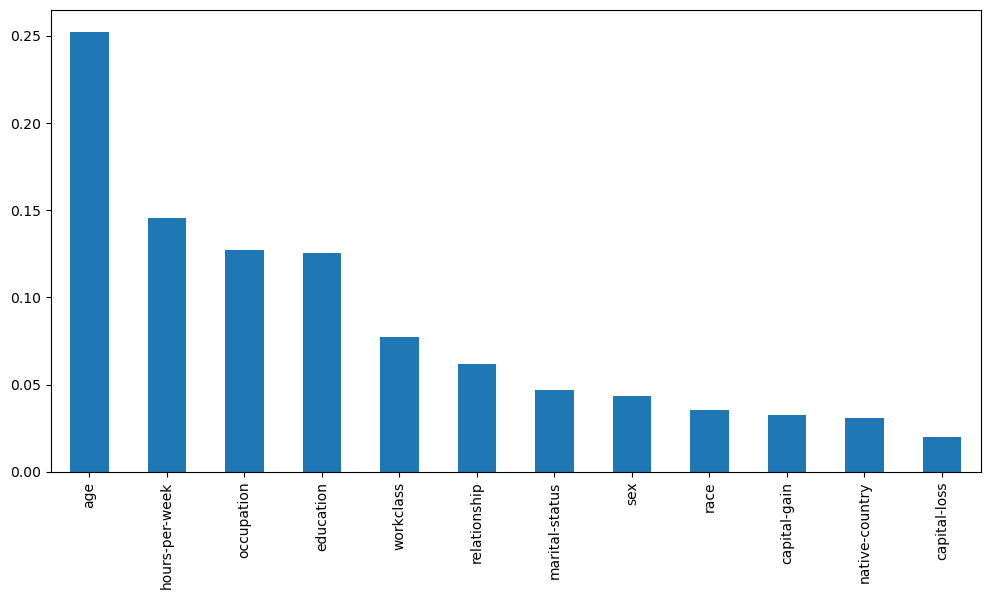

In [107]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# visualise the most important features
feature_importances.head(25).plot(kind='bar', figsize=(12,6))

Model 2 Imputing all data and Linear Regression

In [108]:
#Running a model that fills NA values
dm_fill_na = dm_stripped.copy()

In [109]:
# Fill NA values with the mode of each column
for column in dm_fill_na.columns:
    # Calculate the mode for the column (it returns a Series, so we use mode()[0] to get the value)
    mode_value = dm_fill_na[column].mode()[0]
    
    # Fill NA values in the column with the mode
    dm_fill_na[column].fillna(mode_value, inplace=True)

# Check the result
print(dm_fill_na.head())

                                  unique_id  birth_year workclass  fnlwgt  \
5567   704dbbb0-4fbb-4f98-917c-bdc18c2e62ac        1991   Private  278736   
492    78ebd3dd-e9ae-4e3d-80c7-43e1e2dec93c        1971   Private   53812   
13683  e4bedde7-a824-4ea3-943e-4705bb8336f8        1991   Private  121966   
14042  8ddc88a7-6ec6-4052-a3ef-f1f34235ca46        2000   Private  141040   
1991   57c5c2b4-72b3-4612-9304-f4bc26c138f5        1996   Private   47907   

           marital-status         occupation   relationship   race     sex  \
5567   Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
492               Widowed    Exec-managerial  Not-in-family  White  Female   
13683            Divorced       Adm-clerical  Not-in-family  White  Female   
14042       Never-married       Adm-clerical      Own-child  Black  Female   
1991        Never-married       Adm-clerical  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  in

In [110]:
dm_fill_na.isnull().sum()

unique_id         0
birth_year        0
workclass         0
fnlwgt            0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
education         0
education-num     0
income_pd_cut     0
hours_pd_cut      0
age               0
dtype: int64

In [111]:
dm_fill_na.shape

(14534, 19)

Mean Squared Error (Linear Regression): 832926671.0802982
R-squared Score (Linear Regression): -0.000939933384754843
Mean Absolute Percentage Error (Linear Regression): 0.282817061307042
Mean Absolute Percentage error Error: 0.29513847730624754


<Axes: >

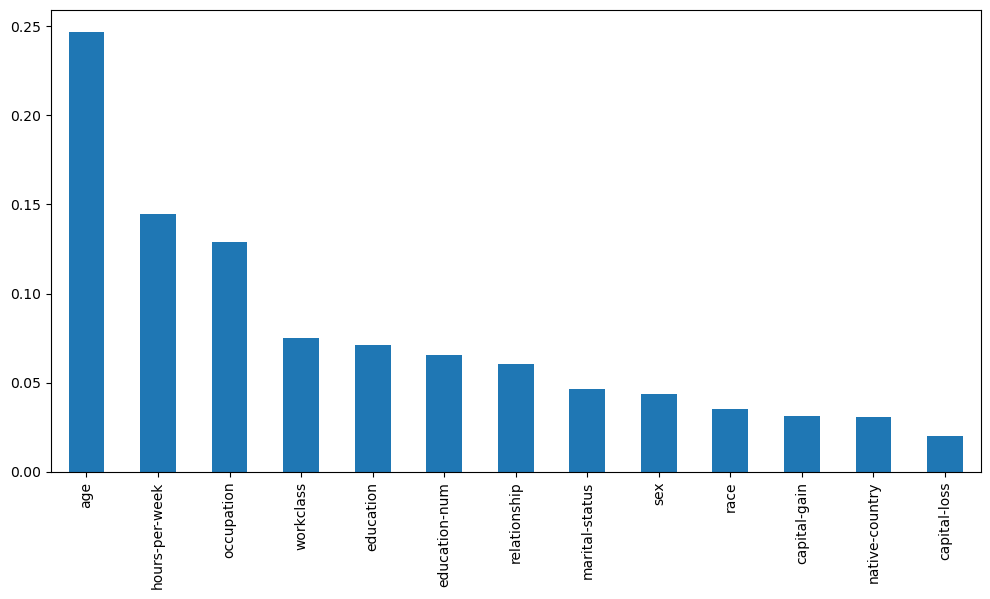

In [112]:
# Label encoding categorical features: 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
le = LabelEncoder()
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education']
for col in categorical_cols:
    dm_fill_na[col] = le.fit_transform(dm_copy_drop[col])

# Defining features (X) and target (y)
X = dm_fill_na[['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num','native-country','education']]
y = dm_fill_na['income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"R-squared Score (Linear Regression): {r2_linear}")
print(f'Mean Absolute Percentage Error (Linear Regression): {mape_linear}')

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage error Error: {mae}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# visualise the most important features
feature_importances.head(25).plot(kind='bar', figsize=(12,6))

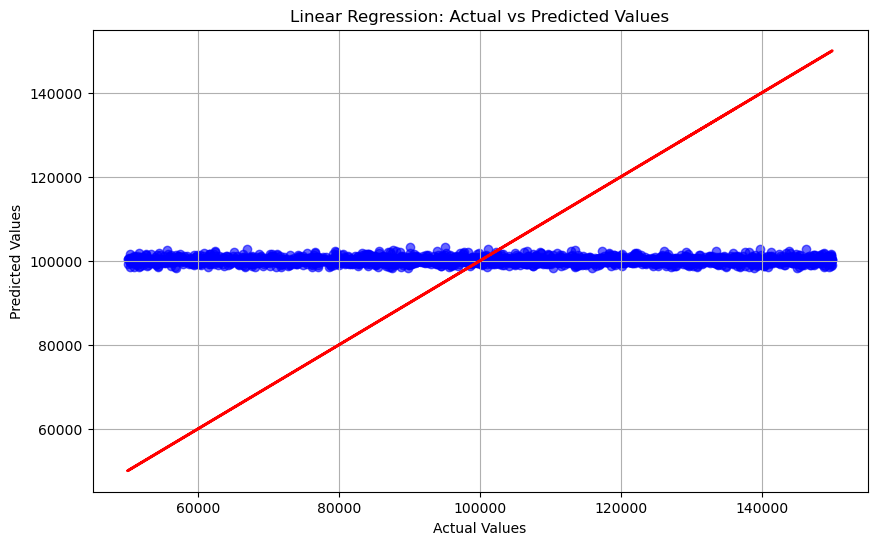

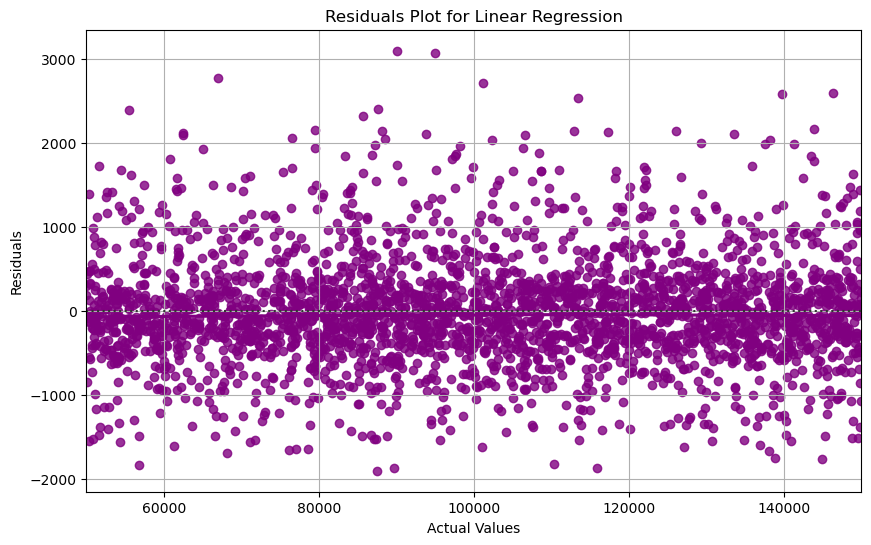

In [113]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='red', linewidth=2)  # This plots the perfect prediction line (y = y_pred)

# Add labels and title
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residuals plot (difference between actual and predicted)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, color='purple')

# Add labels and title
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Graphing

c:\Users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


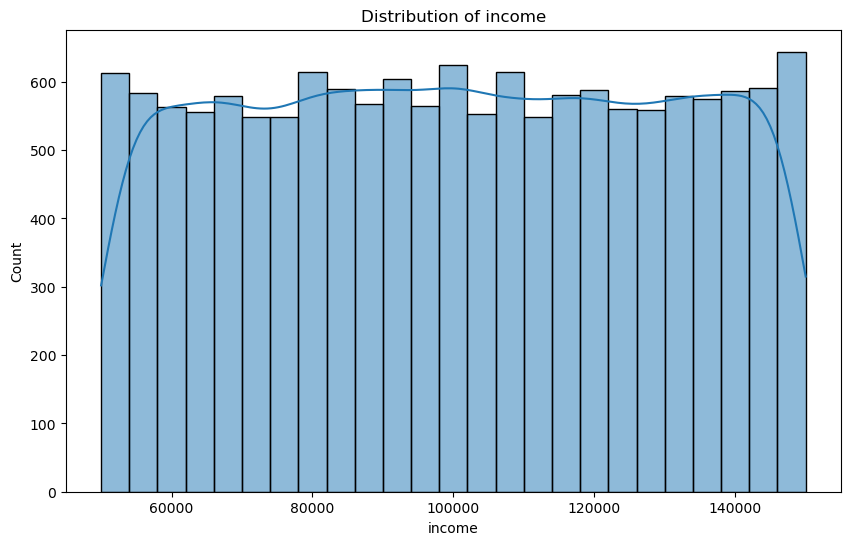

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(dm_stripped['income'], kde=True)
plt.title('Distribution of income')
plt.show()

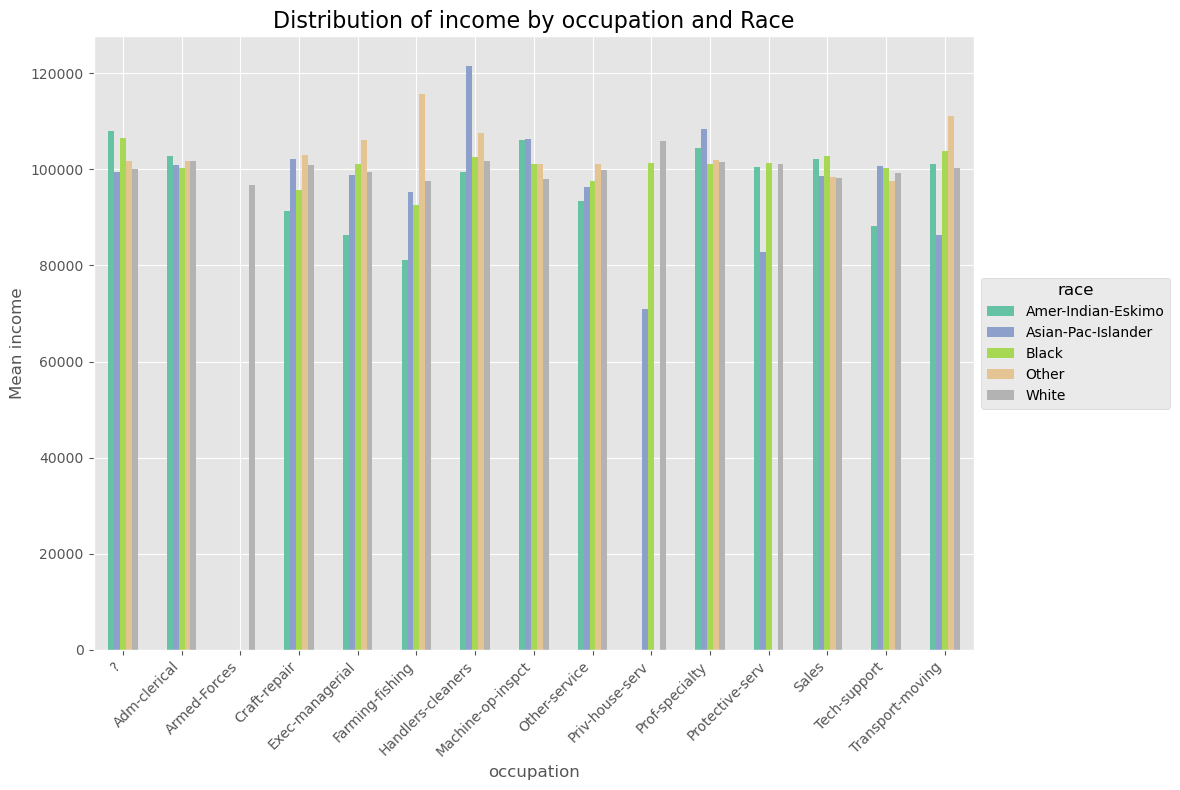

In [115]:
# Set up the plot styleions_race
try:
    plt.style.use('ggplot')
except:
    print("ggplot style not available, using default style.")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))  # Increased width to accommodate legend

# Create the stacked bar plot
pivot_income_occupations_race.plot(kind='bar', ax=ax, 
                       colormap='Set2')  # Using a colormap that's color-blind friendly

# Customize the plot
ax.set_title('Distribution of income by occupation and Race', fontsize=16)
ax.set_xlabel('occupation', fontsize=12)

ax.set_ylabel('Mean income', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add and customize the legend
legend = ax.legend(title='race', loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize='12')  # Adjust legend title font size
plt.setp(legend.get_texts(), fontsize='10')  # Adjust legend text font size

# Adjust layout to make room for the legend
fig.subplots_adjust(right=0.85)

# Ensure x-axis labels are not cut off
fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right boundary to prevent legend cutoff

# Show the plot
plt.show()

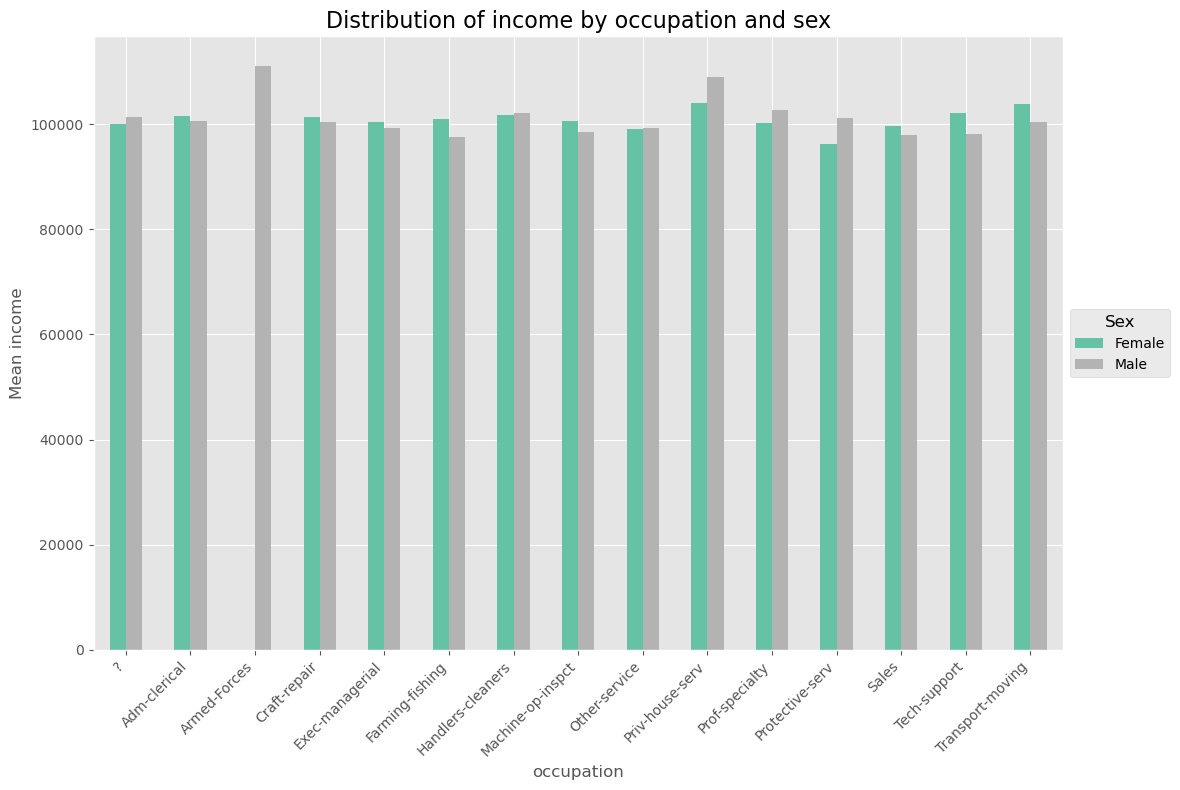

In [116]:
# Set up the plot styleions_race
try:
    plt.style.use('ggplot')
except:
    print("ggplot style not available, using default style.")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))  # Increased width to accommodate legend

# Create the stacked bar plot
pivot_income_occupations_sex.plot(kind='bar', ax=ax, 
                       colormap='Set2')  # Using a colormap that's color-blind friendly

# Customize the plot
ax.set_title('Distribution of income by occupation and sex', fontsize=16)
ax.set_xlabel('occupation', fontsize=12)

ax.set_ylabel('Mean income', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add and customize the legend
legend = ax.legend(title='Sex', loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize='12')  # Adjust legend title font size
plt.setp(legend.get_texts(), fontsize='10')  # Adjust legend text font size

# Adjust layout to make room for the legend
fig.subplots_adjust(right=0.85)

# Ensure x-axis labels are not cut off
fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right boundary to prevent legend cutoff

# Show the plot
plt.show()

In [117]:
pivot_income_hours_per_week_sex = dm_stripped.pivot_table(index='hours_pd_cut', columns='sex',
                            values='income', aggfunc='mean')

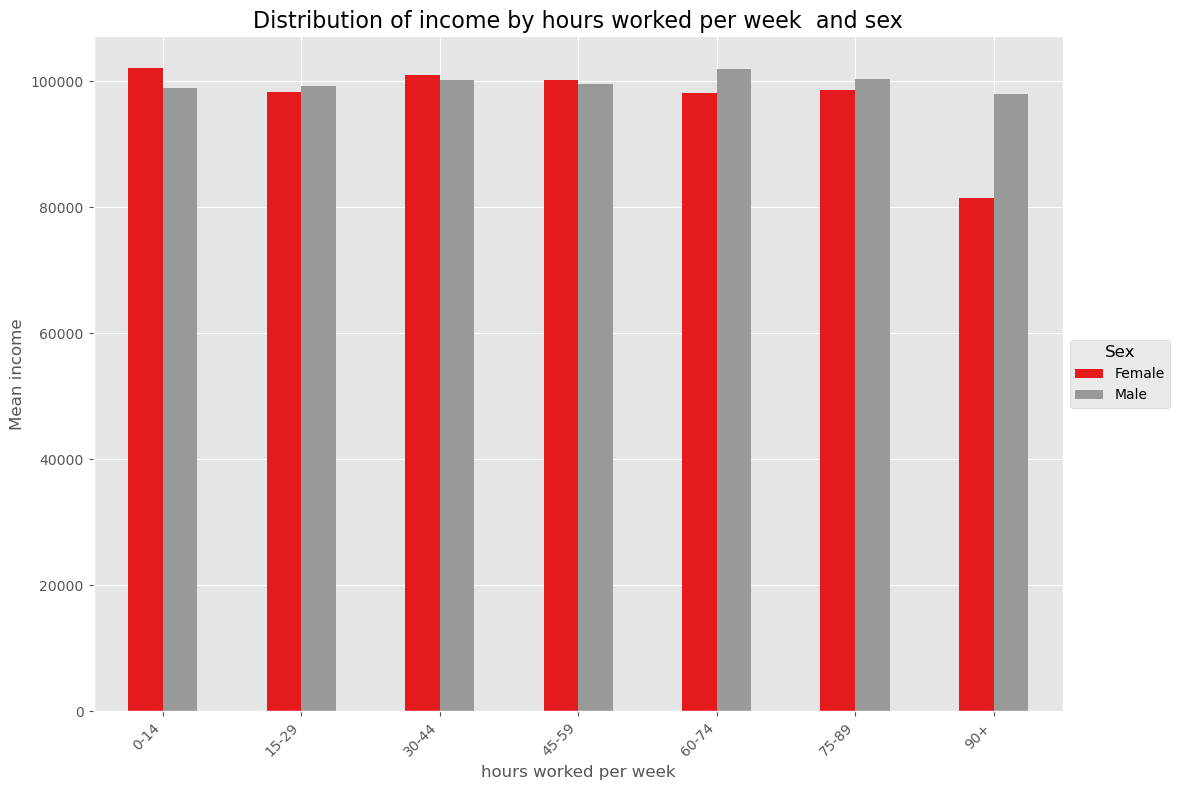

In [118]:
# Set up the plot styleions_race
try:
    plt.style.use('ggplot')
except:
    print("ggplot style not available, using default style.")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))  # Increased width to accommodate legend

# Create the stacked bar plot
pivot_income_hours_per_week_sex.plot(kind='bar', ax=ax, 
                       colormap='Set1')  # Using a colormap that's color-blind friendly

# Customize the plot
ax.set_title('Distribution of income by hours worked per week  and sex', fontsize=16)
ax.set_xlabel('hours worked per week', fontsize=12)

ax.set_ylabel('Mean income', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add and customize the legend
legend = ax.legend(title='Sex', loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize='12')  # Adjust legend title font size
plt.setp(legend.get_texts(), fontsize='10')  # Adjust legend text font size

# Adjust layout to make room for the legend
fig.subplots_adjust(right=0.85)

# Ensure x-axis labels are not cut off
fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right boundary to prevent legend cutoff

# Show the plot
plt.show()

In [119]:
pivot_sex_count_hours = dm_stripped.pivot_table(values='income', index='hours_pd_cut',columns='sex', aggfunc='count')

In [120]:
pivot_sex_count_income = dm_stripped.pivot_table(values='income', index='income_pd_cut',columns='sex', aggfunc='count')

<Axes: xlabel='income_pd_cut'>

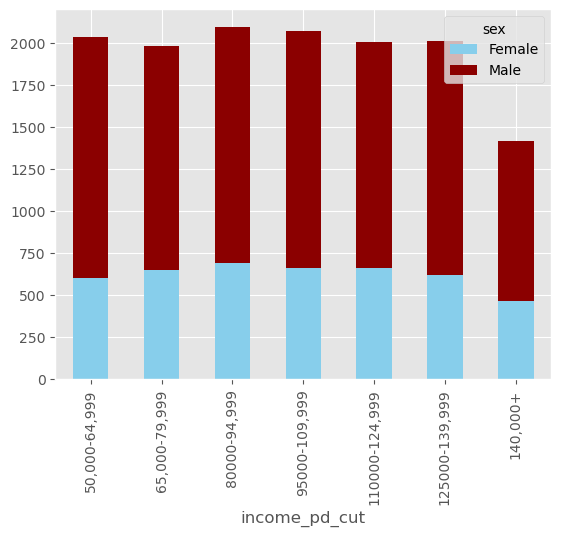

In [121]:
pivot_sex_count_income.plot(kind='bar',stacked=True, color=['skyblue','darkred'])

<Axes: xlabel='income_pd_cut'>

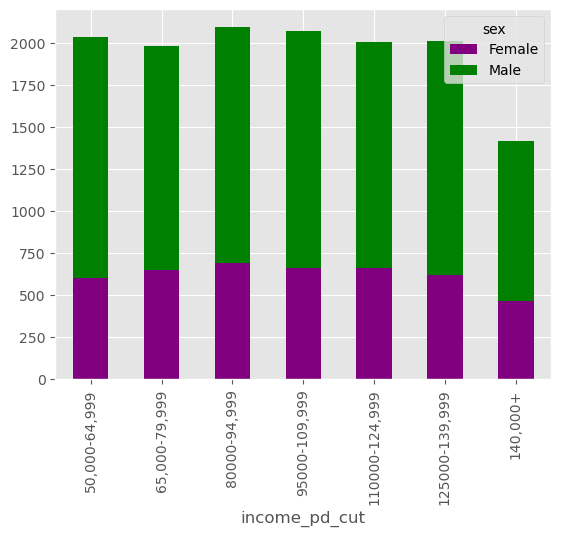

In [122]:
pivot_sex_count_income.plot(kind='bar',stacked=True, color=['purple','green'])

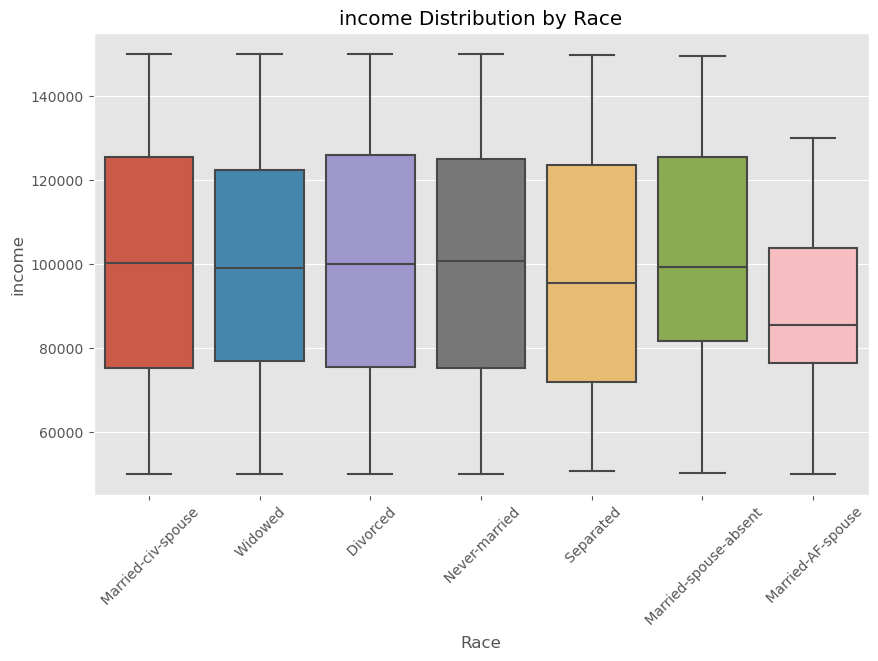

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital-status', y='income', data=data_merge)
plt.title('income Distribution by Race')
plt.xlabel('Race')
plt.xticks([0,1,2,3,4,5,6], rotation=45)
plt.ylabel('income')

plt.show()

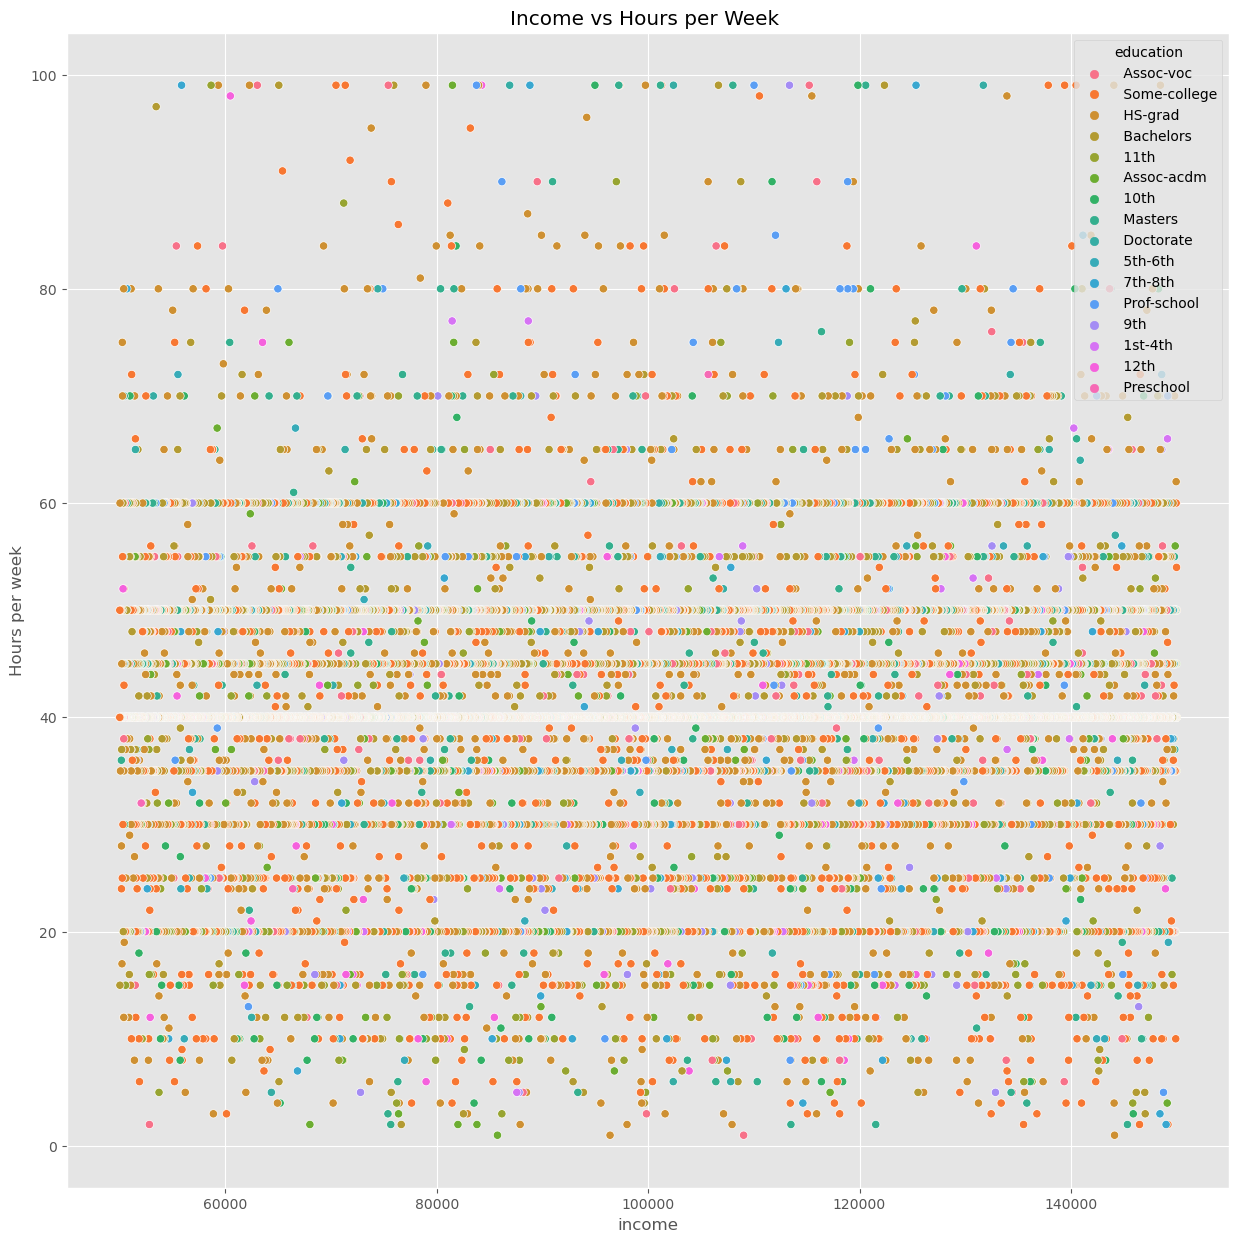

In [124]:

sns.scatterplot(x='income', y='hours-per-week', hue='education', data=data_merge)
plt.title('Income vs Hours per Week ')
plt.xlabel('income')
plt.ylabel('Hours per week')

plt.gcf().set_size_inches((15, 15))
plt.show()

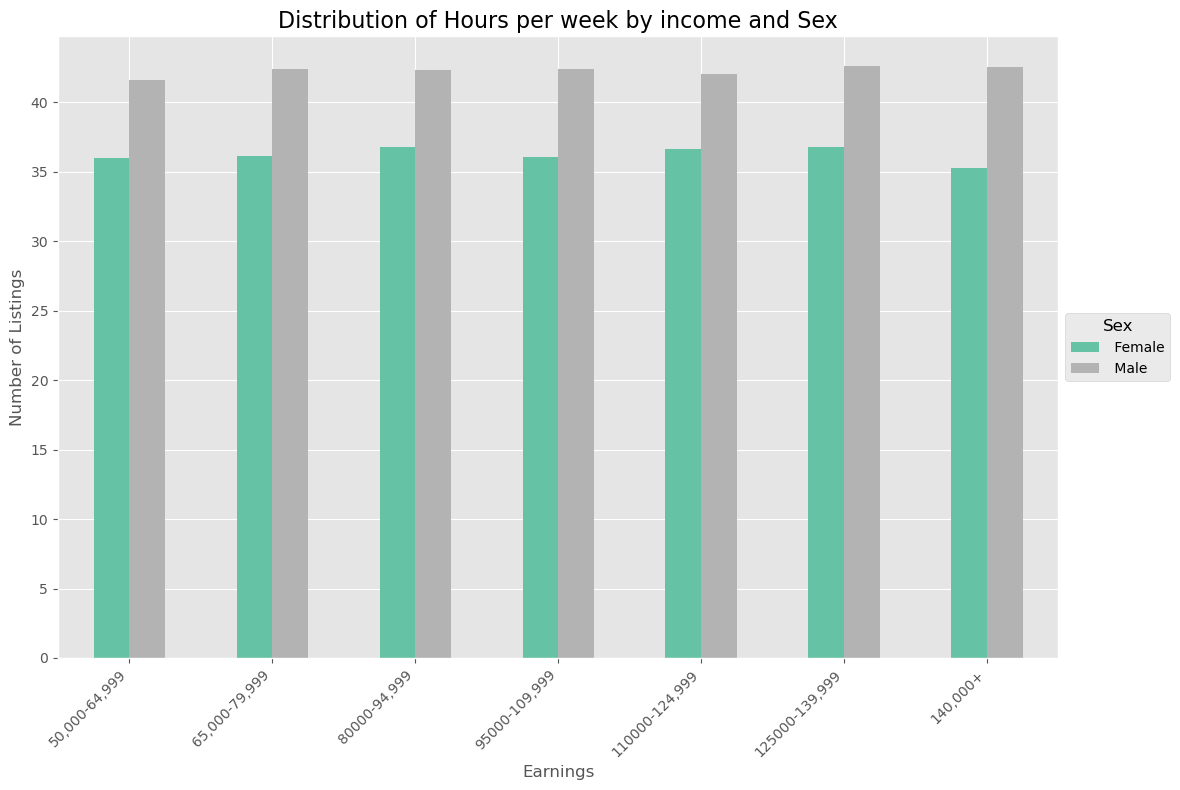

In [125]:
# Create the pivot table
pivot_data = dm_copy.pivot_table(index='income_pd_cut', columns='sex',
                            values='hours-per-week', aggfunc = 'mean')

# Sort the data by total listings in each neighborhood
# pivot_data_sorted = pivot_data.sort_values(by=pivot_data.columns.

# Set up the plot style
try:
    plt.style.use('ggplot')
except:
    print("ggplot style not available, using default style.")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))  # Increased width to accommodate legend

# Create the stacked bar plot
pivot_data.plot(kind='bar', ax=ax, 
                       colormap='Set2')  # Using a colormap that's color-blind friendly

# Customize the plot
ax.set_title('Distribution of Hours per week by income and Sex', fontsize=16)
ax.set_xlabel('Earnings', fontsize=12)

ax.set_ylabel('Number of Listings', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add and customize the legend
legend = ax.legend(title='Sex', loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize='12')  # Adjust legend title font size
plt.setp(legend.get_texts(), fontsize='10')  # Adjust legend text font size

# Adjust layout to make room for the legend
fig.subplots_adjust(right=0.85)

# Ensure x-axis labels are not cut off
fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right boundary to prevent legend cutoff

# Show the plot
plt.show()